<a href="https://colab.research.google.com/github/khushbooekhande/DecisionTree-KNN/blob/master/Copy_of_Copy_of_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('drive/My Drive/255/DT&KNN/evaluation.csv')
data

,car_price,car_maintenance_cost,car_doors,car_capacity,car_luggage_capacity,car_safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
data['decision'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64

## Provide data insights

#### Do following

[link text](https://)1. Provide statistical information of all columns (counts, unique, frequency)
2. Check for null
3. plot pairplot of columns <br>
> Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.
4. Provide pie-chart of each column

In [0]:
#1
data.count()
print('____________________________________________________')
print('\n')
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())
print('____________________________________________________')
print('\n')
for i in data.columns:
    print(data[i].value_counts())
    print()
print('____________________________________________________')
print('\n')

In [30]:
#2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   car_price             1728 non-null   object
 1   car_maintenance_cost  1728 non-null   object
 2   car_doors             1728 non-null   object
 3   car_capacity          1728 non-null   object
 4   car_luggage_capacity  1728 non-null   object
 5   car_safety            1728 non-null   object
 6   decision              1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


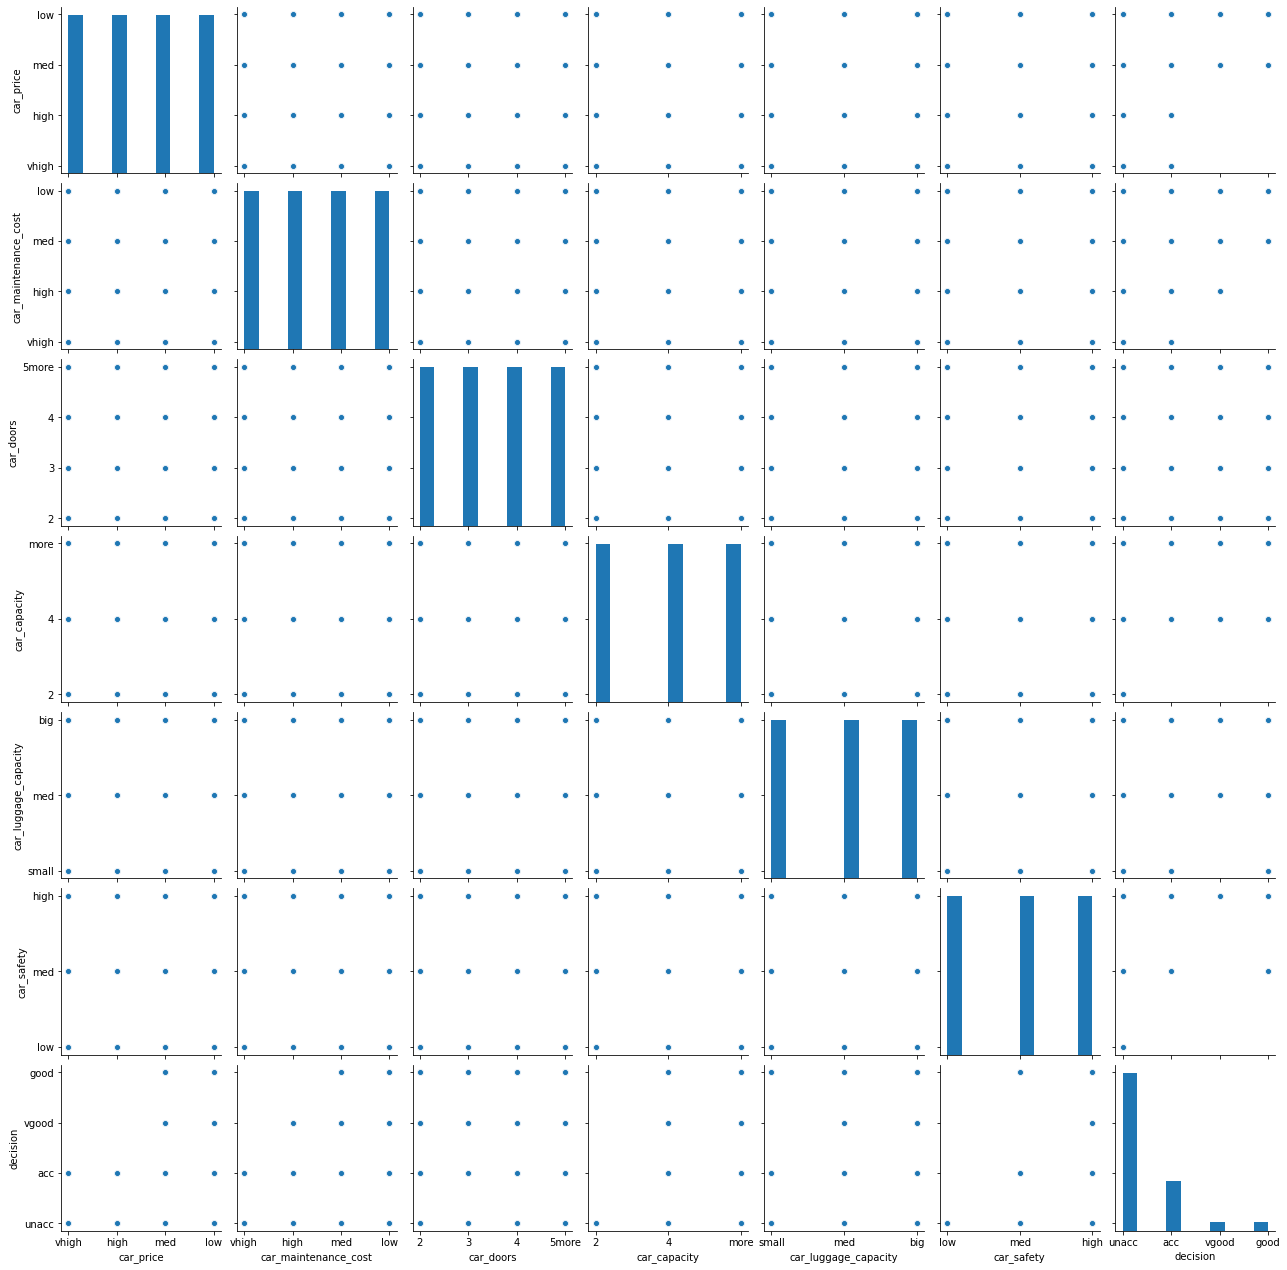

In [9]:
#3
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data, vars=data.columns)


car_price
['vhigh' 'high' 'med' 'low'] 	 4


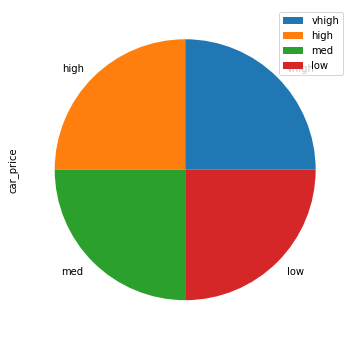

car_maintenance_cost
['vhigh' 'high' 'med' 'low'] 	 4


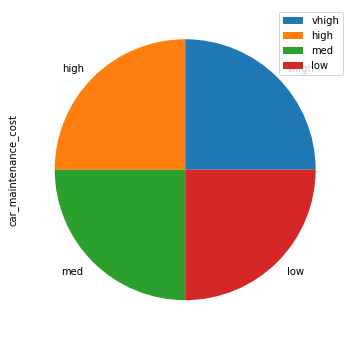

car_doors
['2' '3' '4' '5more'] 	 4


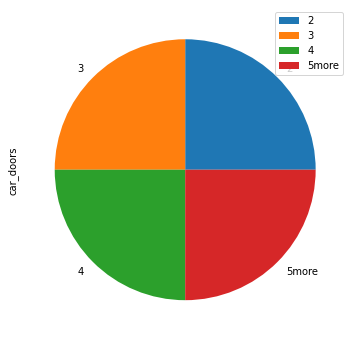

car_capacity
['2' '4' 'more'] 	 3


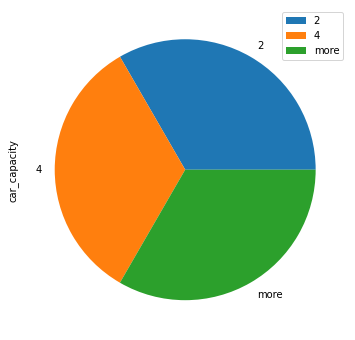

car_luggage_capacity
['small' 'med' 'big'] 	 3


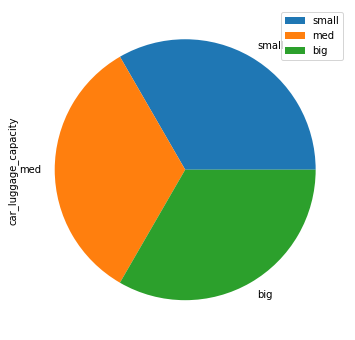

car_safety
['low' 'med' 'high'] 	 3


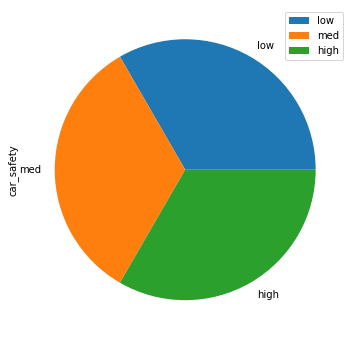

decision
['unacc' 'acc' 'vgood' 'good'] 	 4


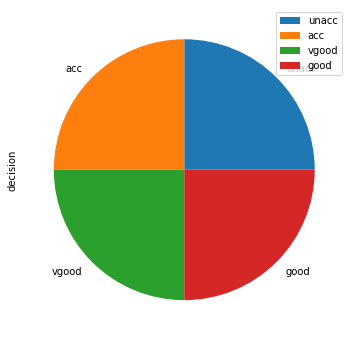

In [68]:
#4
import matplotlib.pyplot as plt
for i in data.columns:
    print(i)
    print(data[i].unique(),"\t",data[i].nunique())
    dataflair= pd.DataFrame({i: data[i].nunique()},index=data[i].unique())
    dataflair.plot.pie(y=i, figsize=(8, 6))
    plt.show()


## Data Preprocessing

In [8]:
# Standardization
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Get column names first
names = data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
for i in data.columns:
    data[i]=le.fit_transform(data[i])
data


,car_price,car_maintenance_cost,car_doors,car_capacity,car_luggage_capacity,car_safety,decision
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [0]:
x = data.iloc[:,:6]
y = data.iloc[:, 6]

In [10]:
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1728, 6)
Shape of y:  (1728,)


In [0]:
# Splitting the dataset into train and test sets (test_size = 0.2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Modeling

Perform following task for both `Decision tree` and `KNN`
1. create a model
2. feed training data into the model
3. predict values for your test data
4. visualize classifier
4. find the training and testing accuracy
5. print confusion matrix

NOTE: 
> 1. Use sklearn's DecisionTreeClassifier <br>
> 2. Visualize your decision trees using any (Scikit-learn, Graphviz, Matplotlib) library

### `Decision Tree Classifier`

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


#### 1. Decision Trees with max_depth = 2

Accuracy of Decision Tree Classifier with  max_depth = 2 is:  74.27745664739885 % 



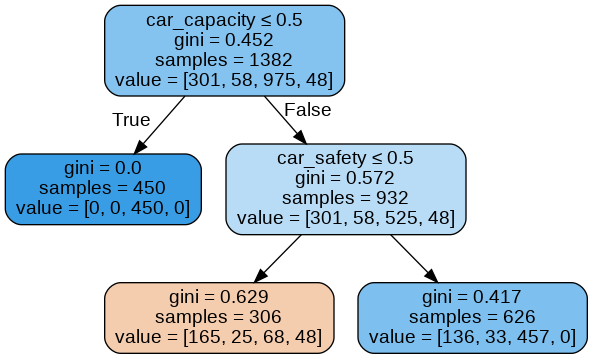

In [47]:
DT_2 = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
DT_2.fit(X_train,y_train)
pred=DT_2.predict(X_test)
acc = (DT_2.score(X_test,y_test))*100
print("Accuracy of Decision Tree Classifier with  max_depth = 2 is: ", acc ,"% \n")

dot_data = StringIO()
feature_cols = [ 'car_price', 'car_maintenance_cost', 'car_doors', 'car_capacity', 'car_luggage_capacity', 'car_safety']
export_graphviz(DT_2, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('car_eval.png')
Image(graph.create_png())

#### 2. Decision Trees with max_depth = 4

In [0]:
DT_4 = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
DT_4.fit(X_train,y_train)
pred=DT_4.predict(X_test)
acc = (DT_4.score(X_test,y_test))*100
print("Accuracy of Decision Tree Classifier with  max_depth = 4 is: ", acc ,"% \n")

dot_data = StringIO()
feature_cols = [ 'car_price', 'car_maintenance_cost', 'car_doors', 'car_capacity', 'car_luggage_capacity', 'car_safety']
export_graphviz(DT_4, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('car_eval.png')
Image(graph.create_png())

#### 3. Decision Trees with max_depth = 6

In [0]:
DT_6 = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)
DT_6.fit(X_train,y_train)
pred=DT_6.predict(X_test)
acc = (DT_6.score(X_test,y_test))*100
print("Accuracy of Decision Tree Classifier with  max_depth = 6 is: ", acc ,"% \n")

dot_data = StringIO()
feature_cols = [ 'car_price', 'car_maintenance_cost', 'car_doors', 'car_capacity', 'car_luggage_capacity', 'car_safety']
export_graphviz(DT_6, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('car_eval.png')
Image(graph.create_png())

#### 4. Decision Trees with max_depth = 8

In [0]:
DT_8 = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
DT_8.fit(X_train,y_train)
pred=DT_8.predict(X_test)
acc = (DT_8.score(X_test,y_test))*100
print("Accuracy of Decision Tree Classifier with  max_depth = 8 is: ", acc ,"% \n")

dot_data = StringIO()
feature_cols = [ 'car_price', 'car_maintenance_cost', 'car_doors', 'car_capacity', 'car_luggage_capacity', 'car_safety']
export_graphviz(DT_8, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('car_eval.png')
Image(graph.create_png())

#### 5. Decision Trees with max_depth = 10

In [0]:
DT_10 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)
DT_10.fit(X_train,y_train)
pred=DT_10.predict(X_test)
acc = (DT_10.score(X_test,y_test))*100
print("Accuracy of Decision Tree Classifier with  max_depth = 10 is: ", acc ,"% \n")

dot_data = StringIO()
feature_cols = [ 'car_price', 'car_maintenance_cost', 'car_doors', 'car_capacity', 'car_luggage_capacity', 'car_safety']
export_graphviz(DT_10, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('car_eval.png')
Image(graph.create_png())

#### 6. Decision Trees with max_depth = 12

In [0]:
DT_12 = DecisionTreeClassifier(max_depth = 12).fit(X_train, y_train)
DT_12.fit(X_train,y_train)
pred=DT_12.predict(X_test)
acc = (DT_12.score(X_test,y_test))*100
print("Accuracy of Decision Tree Classifier with  max_depth = 12 is: ", acc ,"% \n")

dot_data = StringIO()
feature_cols = [ 'car_price', 'car_maintenance_cost', 'car_doors', 'car_capacity', 'car_luggage_capacity', 'car_safety']
export_graphviz(DT_12, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('car_eval.png')
Image(graph.create_png())

#### plot the graph for performance (accuracy) of decision trees with different max_depth values
max_depth = [2, 4, 6, 8, 10, 12]

Text(0, 0.5, 'accuracy')

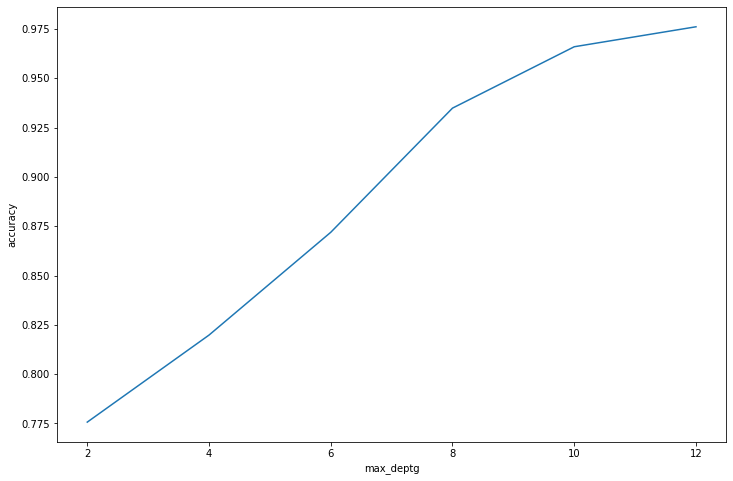

In [123]:
avg_score=[]
MD= [2, 4, 6, 8, 10, 12]
for d in MD:
    DT=DecisionTreeClassifier(max_depth = d).fit(X_train, y_train)
    score=cross_val_score(DT,X_train,y_train,scoring='accuracy')
    avg_score.append(score.mean())


plt.figure(figsize=(12,8))
plt.plot(MD,avg_score)
plt.xlabel("max_deptg")
plt.ylabel("accuracy")



### `KNN Classifiers`

NOTE: 
> 1. Use sklearn's KNeighborsClassifier
> 2. Visualize your KNN using any(Scikit-learn, Matplotlib) library

#### 1. n_neighbors = 1

In [89]:
knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
acc = (knn.score(X_test,y_test))*100
print("Accuracy of KNN Classifier with  n_neighbors = 1 is: ", acc ,"%")

Accuracy of KNN Classifier with  n_neighbors = 1 is:  83.52601156069365 %


#### 2. n_neighbors = 2

In [107]:
knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=2)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
acc = (knn.score(X_test,y_test))*100
print("Accuracy of KNN Classifier with  n_neighbors = 2 is: ", acc ,"%")

Accuracy of KNN Classifier with  n_neighbors = 2 is:  79.76878612716763 %


#### 3. n_neighbors = 3

In [91]:
knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
acc = (knn.score(X_test,y_test))*100
print("Accuracy of KNN Classifier with  n_neighbors = 3 is: ", acc ,"%")

Accuracy of KNN Classifier with  n_neighbors = 3 is:  86.70520231213872 %


#### 4. n_neighbors = 4

In [92]:
knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=4)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
acc = (knn.score(X_test,y_test))*100
print("Accuracy of KNN Classifier with  n_neighbors =4 is: ", acc ,"%")

Accuracy of KNN Classifier with  n_neighbors =4 is:  85.54913294797689 %


#### plot the graph for performance (accuracy) of KNN with different neighbours values
n_neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [0]:
avg_score=[]
for k in range(1,10):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

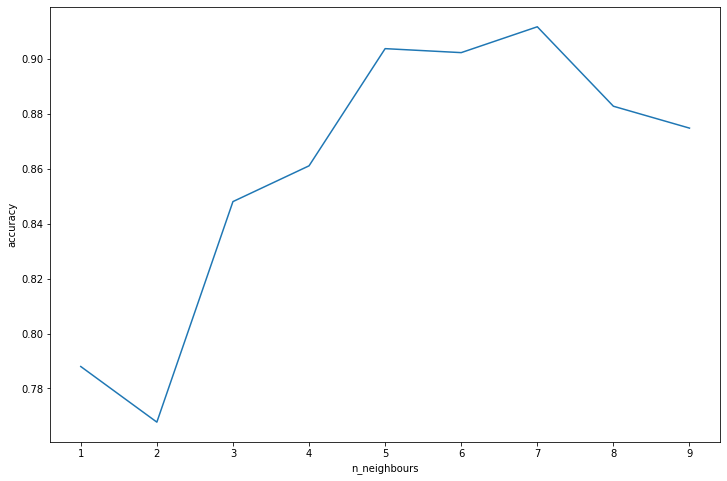

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(range(1,10),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")